## Manipulating Pixels of An Image:
When we load an image using scikit-image, we actually load pixel values as a Numpy array. Image's width and height become array's size. If it is a grayscale image, we just have one 2-D array. If it is a colored image, then three 2-D arrays are loaded corresponding to each of the Red, Green and Blue channels. 
That means, we can manipulate images by accessing array elements of interest. 
In the following, we will apply some operations to the image arrays:
- We will set some pixel values to a certain value (thresholding)
- We will slice the images (clipping)
- We will set a certain section of the image to a constant value (masking)

Please note this section is for introductory purposes only. In the following sections of this tutorial, we will go into further details on these operations. 

- ### Thresholding:

Let us set pixel values under 50 to 0 and pixels above 20 to 100 in this <a href=https://www.wallpaperflare.com/green-pink-and-yellow-flowers-plants-colorful-stones-flowering-plant-wallpaper-ppdqv>image</a>:

In [1]:
#import necessary libraries:
import matplotlib.pyplot as plt
import skimage.io
import numpy as np

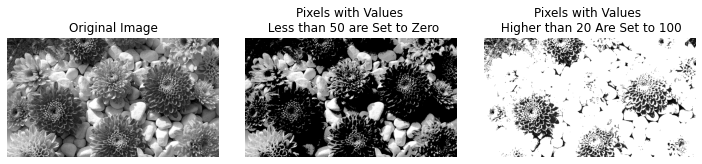

In [2]:
#Load the image in grayscale
flower_original = skimage.io.imread(fname='flower.jpg', as_gray=True)
#To avoid dealing with decimal numbers, array elements' values are multiplied by 100  
flower = flower_original*100
#make manipulations on the copy of the image
flower_low = flower.copy()
#Set pixels with values less than 50 to 0
flower_low[flower_low<50]=0
flower_high = flower.copy()
#Set pixels with values greater than 20 to 100
flower_high[flower_high>20] = 100
#Plot the original, and the manipulated images side by side for comparison purposes:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(10, 8), sharex=True, sharey=True)
ax1.imshow(flower_original,cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.axis('off')
ax2.imshow(flower_low, cmap=plt.cm.gray)
ax2.set_title('Pixels with Values \n Less than 50 are Set to Zero')
ax2.axis('off')
ax3.imshow(flower_high, cmap=plt.cm.gray)
ax3.set_title('Pixels with Values \n Higher than 20 Are Set to 100')
ax3.axis('off')
fig.tight_layout()


As expected, when pixels with values less than 50 are set to 0, we have a darker image since 0 corresponds to black, whereas when pixels with values greater than 20 are set to 100, we have a lighter image since greater numbers represent the lighter end of the spectrum.

- ### Clipping Part of an Image:

Let's clip a certain part of the following image:

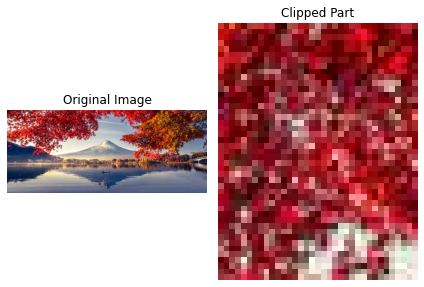

In [3]:
#clipping a part of the image.
image = skimage.io.imread('land.jpg')
plt.subplot(1,2,1)
plt.title('Original Image')
plt.axis('off')
plt.imshow(image)
clip = image[15:60,  60:95,:]
plt.subplot(1,2,2)
plt.title('Clipped Part')
plt.imshow(clip)
plt.axis('off')
plt.tight_layout()

- ### Masking:

Find the color at pixel (4, 5), then apply that color to a slice of the image.

array([140,  30,  31], dtype=uint8)

(-0.5, 348.5, 143.5, -0.5)

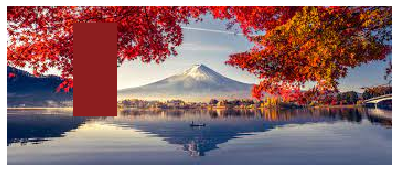

In [4]:
#Find the color at this pixel:
color = image[4, 5]
#Display color values:
display(color)
#Set certain pixels to the stored color value
image[15:100, 60:100,:]=color
skimage.io.imshow(image)
plt.axis('off')

## Exercise: Determining the Color Change in a Titration Experiment
Let's say our task at hand is to determine when the color of the liquid changes in a titration experiment. For this, we may have to take several pictures and observe how color values of pixels of interest change over time. 

Our job for this exercise is to access the array elements of interest and calculate the mean values of red, blue and green channels for those pixels. Let us use this titration <a href=https://www.brand.de/en/applications/titration>image </a>. 

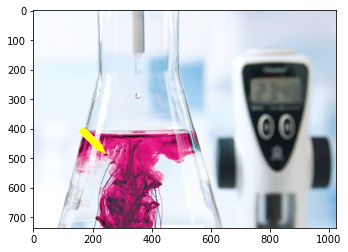

In [5]:
#load and display the image:
titration = skimage.io.imread('titration.jpg')
fig, ax = plt.subplots(1,1)
ax.imshow(titration)
plt.arrow(170, 410, 50, 50, linewidth=7, color='yellow')
#plt.axis('off')
plt.show()


We will focus on the pixels the yellow arrow points at.

(-0.5, 9.5, 6.5, -0.5)

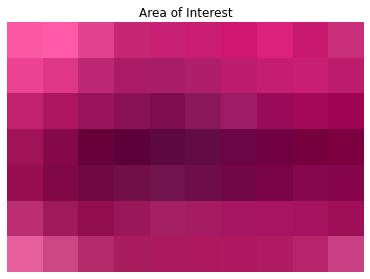

In [6]:
clip = titration[485:492,240:250,:]
skimage.io.imshow(clip)
plt.title('Area of Interest')
plt.axis('off')

Now that we extracted our clip from the image, we can find the average red, blue and green values of this clip. We will go about this in two ways. 

The first one is the manual way; we will go through each pixel and collect red, blue and green channel values then find each channel's average value: 

In [7]:
#Create empty lists to hold r,g,b values:
red_channel = []
green_channel = []
blue_channel = []
#Go through the pixels in the clip, and store each one's r,g,b values
for j in range(7):
    for i in range(10):
        red_channel.append(clip[j][i][0])
        green_channel.append(clip[j][i][1])
        blue_channel.append(clip[j][i][2])
print('For the selected clip: \n')
print('Average red value: {}'.format(np.round(np.mean(red_channel))))
print('Average blue value: {}'.format(np.round(np.mean(blue_channel))))
print('Average green value: {}'.format(np.round(np.mean(green_channel))))


For the selected clip: 

Average red value: 165.0
Average blue value: 97.0
Average green value: 26.0


The second way involves having Numpy automatically go through the channels and find the means of each channel:

In [8]:
print('For the selected clip:\n')
print('Average red value: {}'.format(np.round(np.mean(clip[:,:,0]))))
print('Average blue value: {}'.format(np.round(np.mean(clip[:,:,2]))))
print('Average green value: {}'.format(np.round(np.mean(clip[:,:,1]))))

For the selected clip:

Average red value: 165.0
Average blue value: 97.0
Average green value: 26.0


In the clip, the dominant color is magenta which is a combination of red and blue. From the results above, we see that red color's value is indeed the highest, followed by the blue color. Unsurprisingly, green color is the lowest in value.